In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
print("The problem being solved here is a classification rather than a regression.\nThis is because the target variable, whether one is prone to a heart attack, is a binary categorical variable.")

The problem being solved here is a classification rather than a regression.
This is because the target variable, whether one is prone to a heart attack, is a binary categorical variable.


In [85]:
patients_df = pd.read_csv('/content/drive/MyDrive/COSC3337/hw2/data.csv')
patients_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [86]:
print("Number of observation: ", patients_df.shape[0])
num_missVal = patients_df.isnull().sum().sum()
if num_missVal == 0:
  print("There are no missing values in the dataset")
else:
  print("Number of missing values:\n", num_missVal)

print("Number of unique values per column:\n", patients_df.nunique())

print("\nage = continuos (rounded non-discrete)\nsex = categorical (binary)\ncp = continuous (ordinal stronger...higher)\
\ntrtbps = continuous (rounded non-discrete)\nchol = continuous (rounded non-discrete)\
\nfbs = categorical (binary t/f)\nrestecg = categorical (binary)\nthalachh = continuous (rounded non-discrete)\
\nexng = categorical (binary present/not)\noldpeak = continuous (rounded non-discrete)\nslp = categorical (three finite values 0/1/2)\
caa = continuous (ordinal)\nthall = continuous (ordinal)\noutput = categorical (binary t/f)")

categorical_df = patients_df[['sex','fbs','restecg','exng','slp', 'output']]
continuous_df = patients_df[['age','cp','trtbps','chol','thalachh','oldpeak','caa','thall','output']]

Number of observation:  303
There are no missing values in the dataset
Number of unique values per column:
 age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

age = continuos (rounded non-discrete)
sex = categorical (binary)
cp = continuous (ordinal stronger...higher)
trtbps = continuous (rounded non-discrete)
chol = continuous (rounded non-discrete)
fbs = categorical (binary t/f)
restecg = categorical (binary)
thalachh = continuous (rounded non-discrete)
exng = categorical (binary present/not)
oldpeak = continuous (rounded non-discrete)
slp = categorical (three finite values 0/1/2)caa = continuous (ordinal)
thall = continuous (ordinal)
output = categorical (binary t/f)


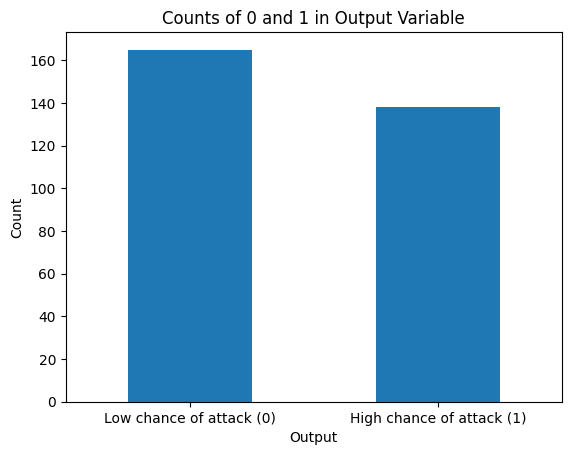

In [87]:
output_counts = patients_df['output'].value_counts()
output_counts.plot(kind='bar')
plt.title('Counts of 0 and 1 in Output Variable')
plt.xlabel('Output')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Low chance of attack (0)', 'High chance of attack (1)'], rotation=0)  # Ensure x-tick labels are correctly set
plt.show()

In [88]:
print("As the result shown above, the data was slightly imbalanced.\nIn classification model, using balanced data is important to reduce disparity. There are two ways yo achieve this\
\nResample the smaller target or Set-aside some of the larger targets. In my program, I'll use the set-aside method because I do not like fabricating data.")

#balance by under sampling
minority_count = patients_df['output'].value_counts().min()
df_minority = patients_df[patients_df['output'] == patients_df['output'].value_counts().idxmin()]
df_majority = patients_df[patients_df['output'] == patients_df['output'].value_counts().idxmax()]

df_majority_downsampled = df_majority.sample(n=minority_count, random_state=42)

patient_df = pd.concat([df_minority, df_majority_downsampled])

#re-create the categorical & continuous dataset
categorical_df = patients_df[['sex','fbs','restecg','exng','slp','output']]
continuous_df = patients_df[['age','cp','trtbps','chol','thalachh','oldpeak','caa','thall','output']]

As the result shown above, the data was slightly imbalanced.
In classification model, using balanced data is important to reduce disparity. There are two ways yo achieve this
Resample the smaller target or Set-aside some of the larger targets. In my program, I'll use the set-aside method because I do not like fabricating data.


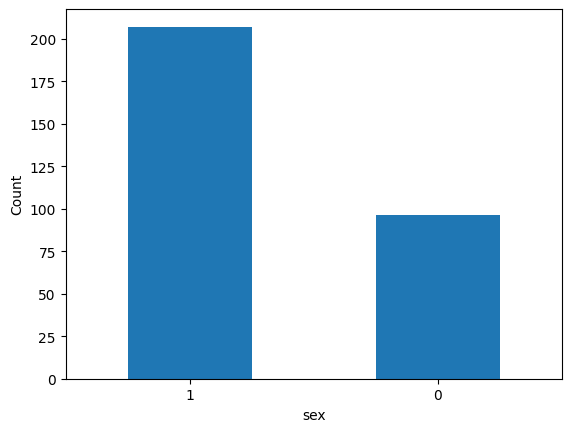

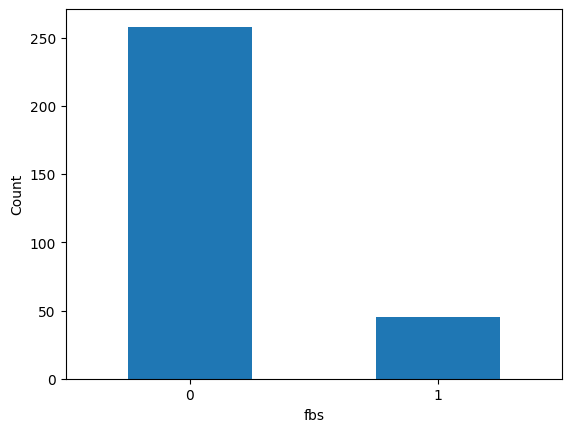

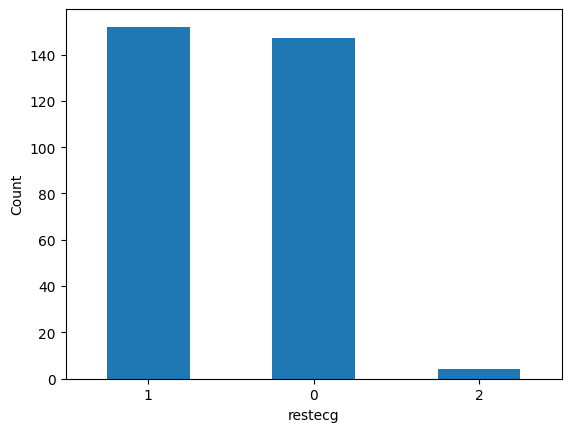

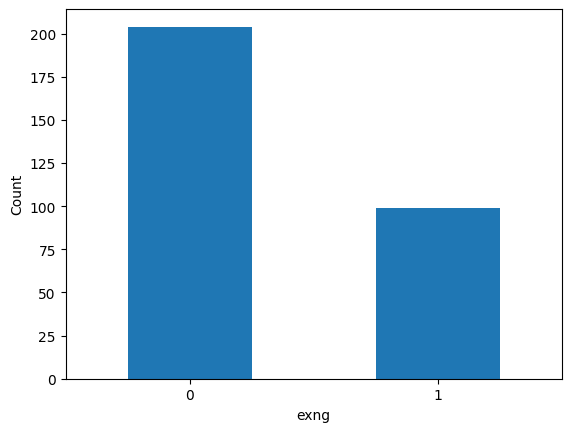

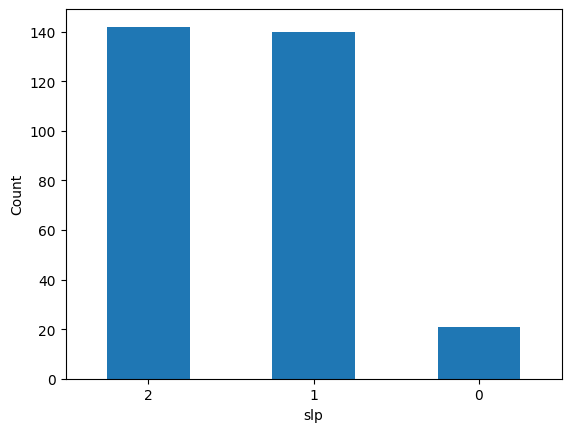

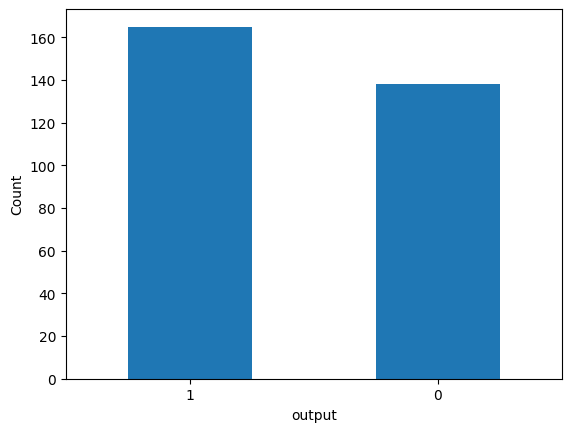

In [79]:
for column in categorical_df.columns:
  output_counts = categorical_df[column].value_counts()
  output_counts.plot(kind='bar')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.xticks(rotation=0)
  plt.show()

In [57]:
print('In every variable, there seemed to be a certain imbalance.')

In every variable, there seemed to be a certain imbalance.


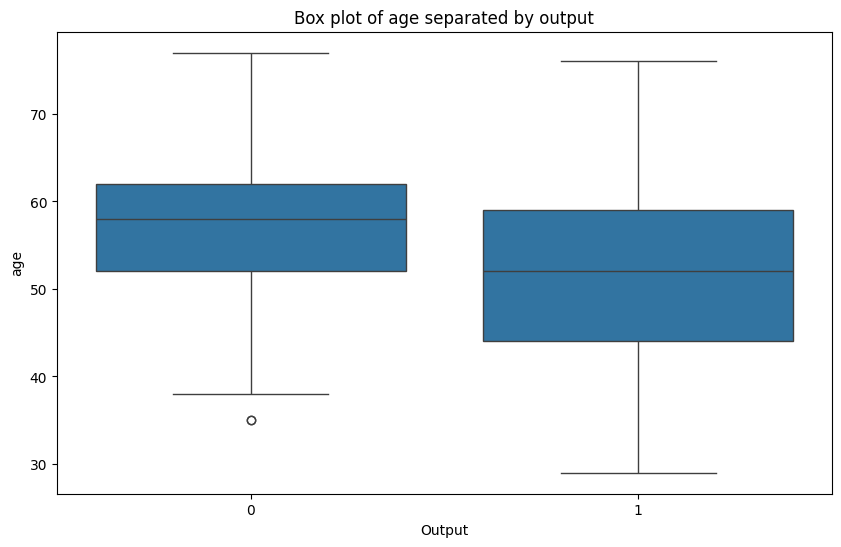

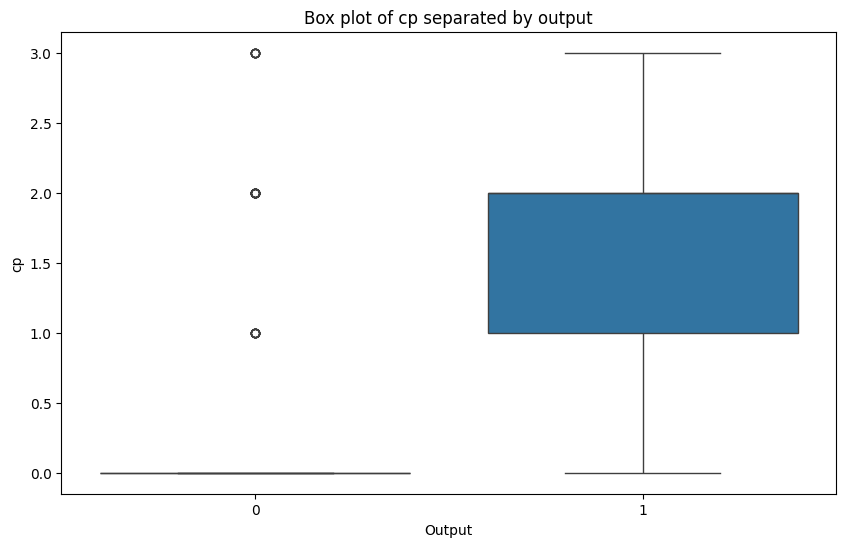

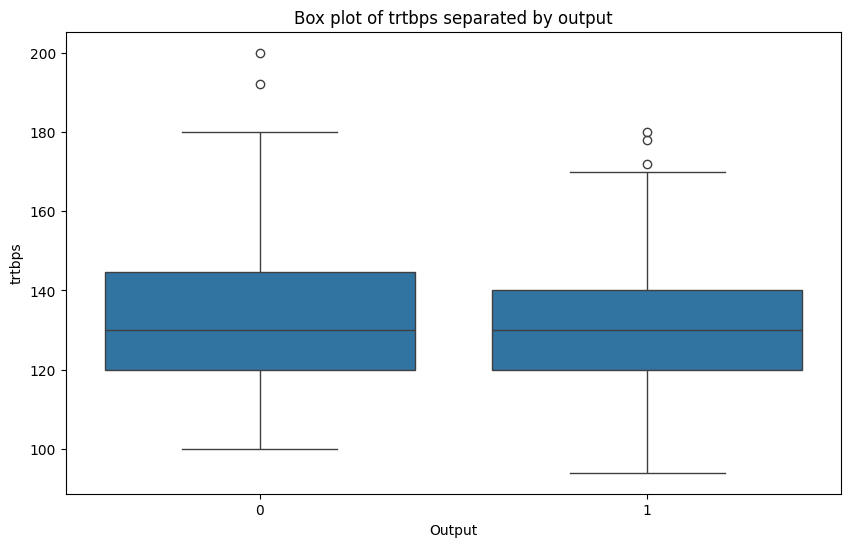

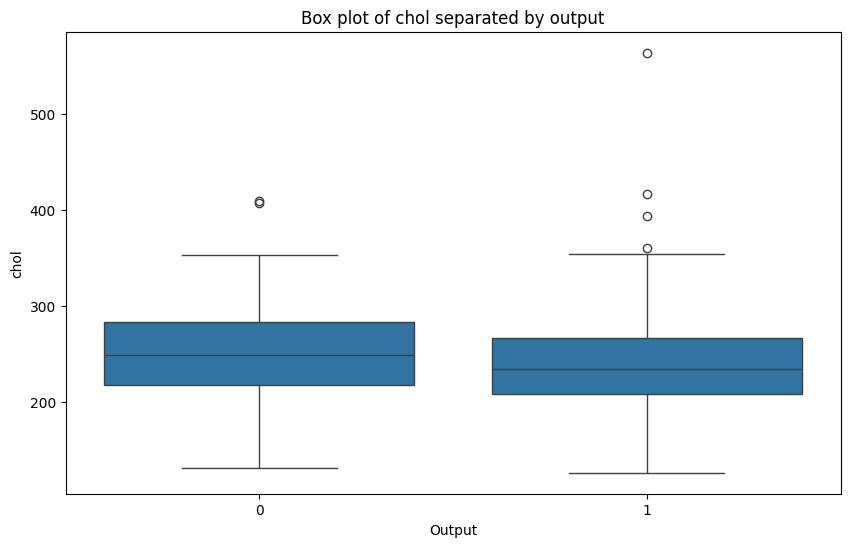

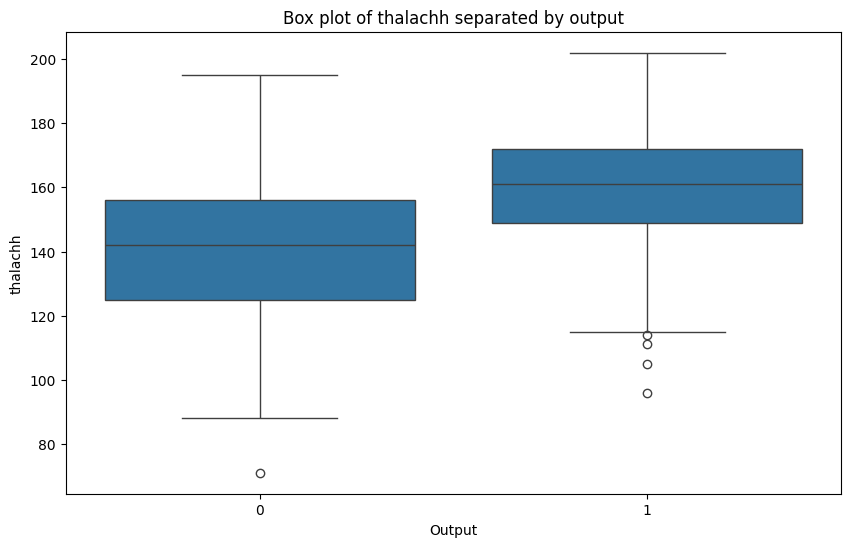

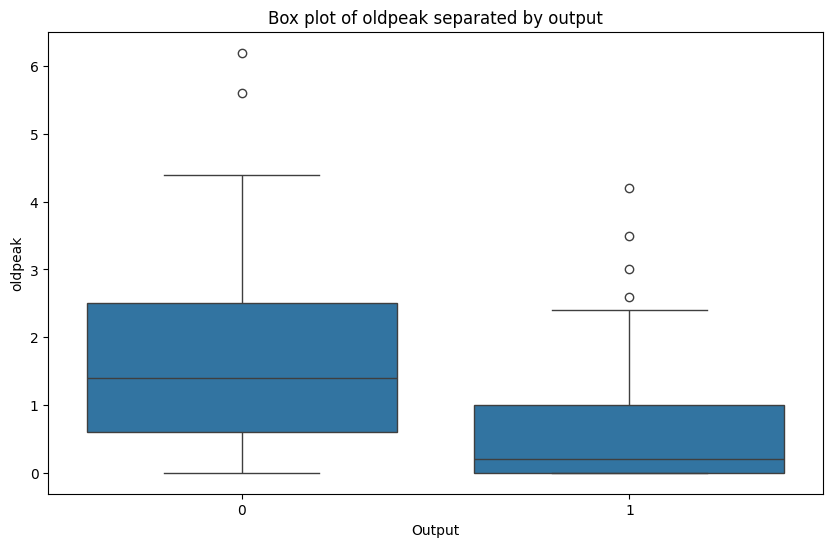

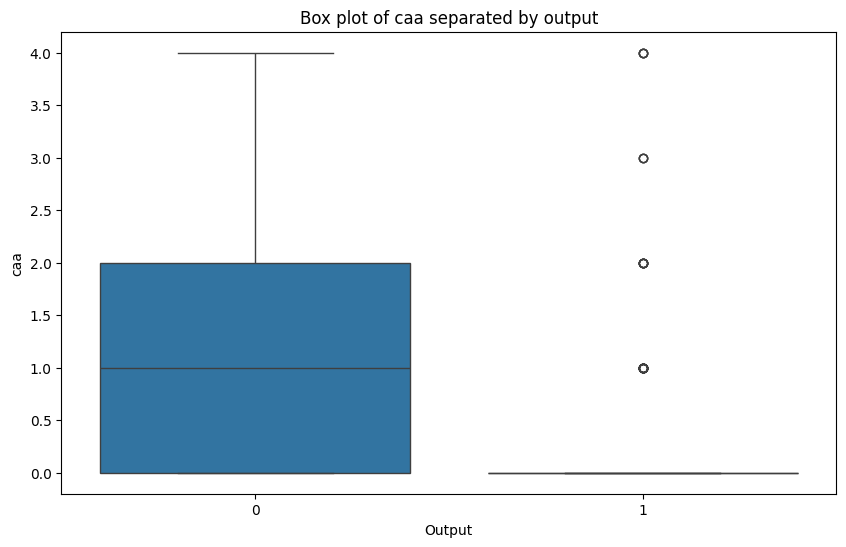

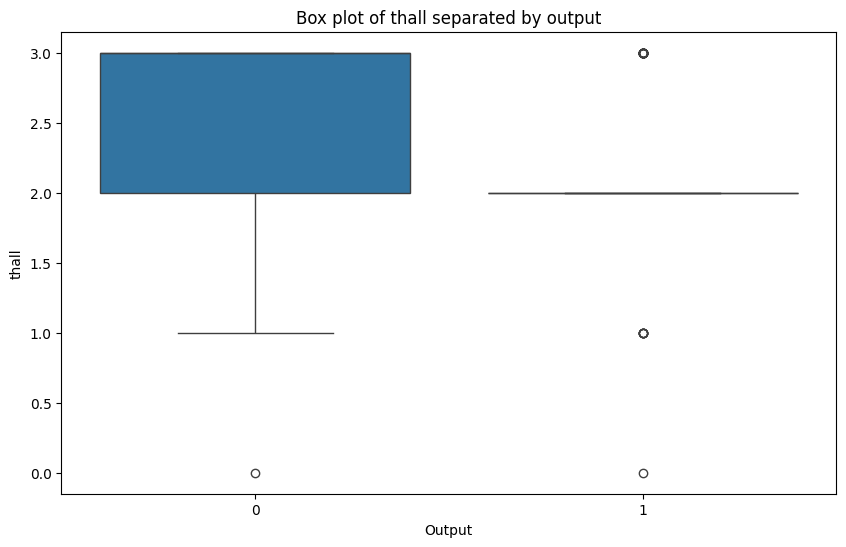

In [55]:

# Loop through each column in continuous_df to create a boxplot for each
for column in continuous_df.columns.drop('output'):
    plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
    sns.boxplot(x=patients_df['output'], y=continuous_df[column])
    plt.title(f'Box plot of {column} separated by output')
    plt.xlabel('Output')
    plt.ylabel(column)
    plt.show()

In [56]:
print('Some variables, such as cp, caa, thall had significant difference between the outcomes.')

Some variables, such as cp, caa, thall had significant difference between the outcomes.


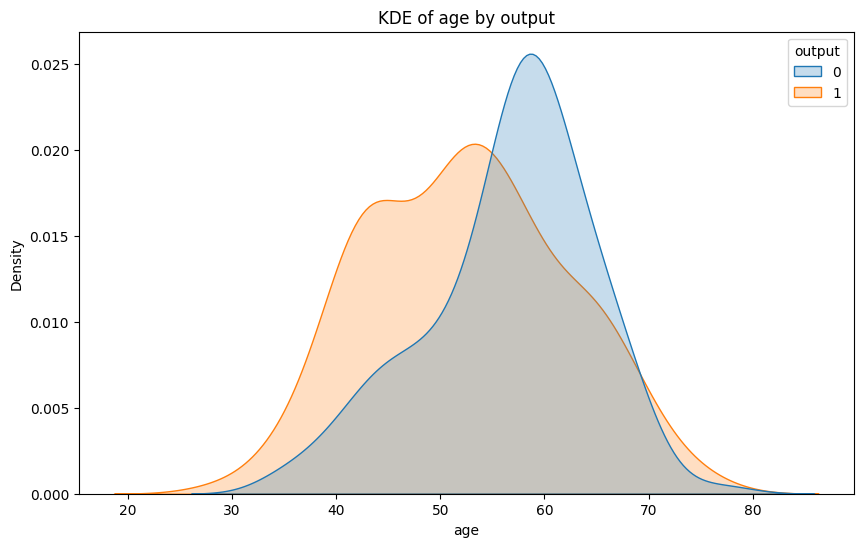

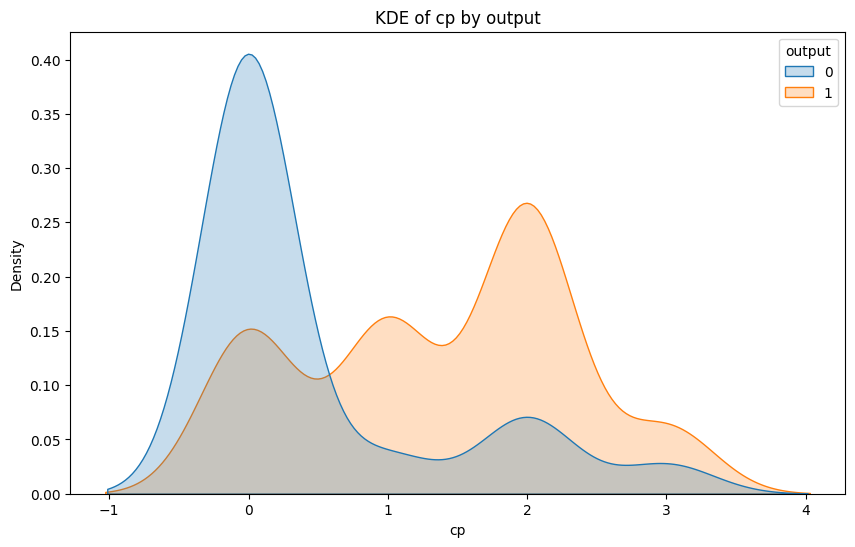

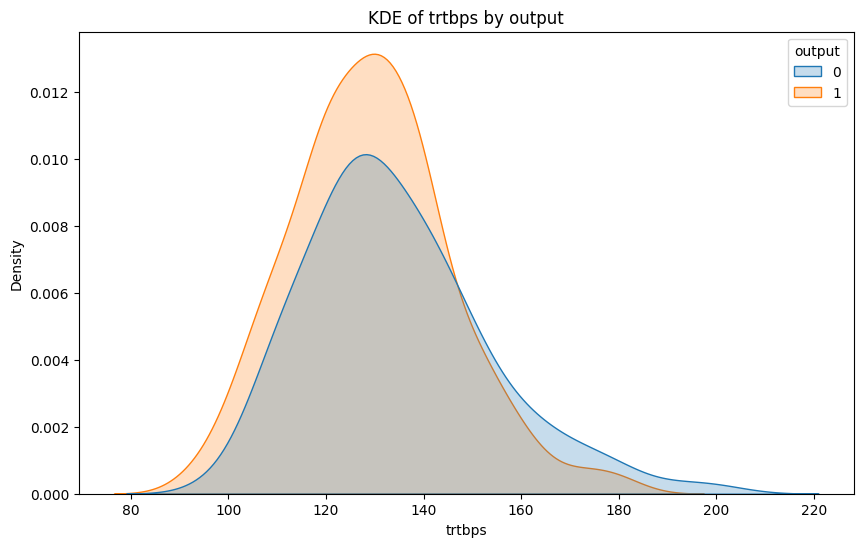

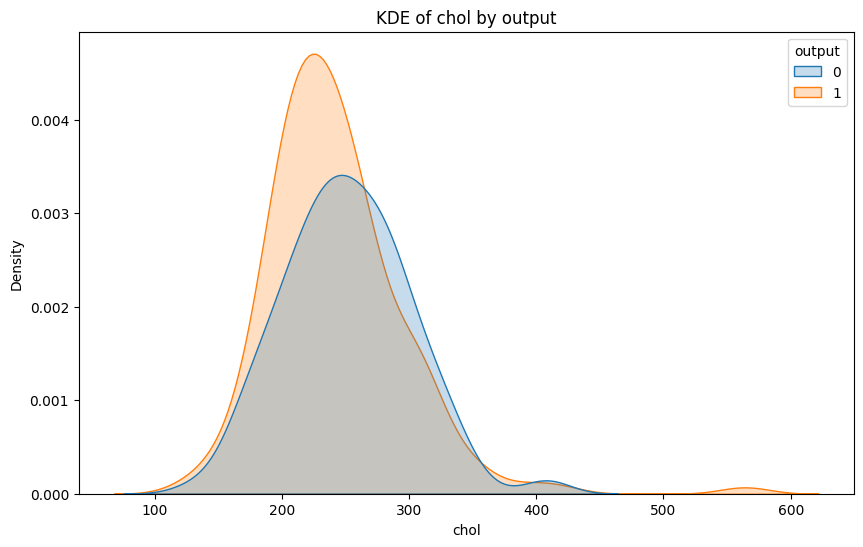

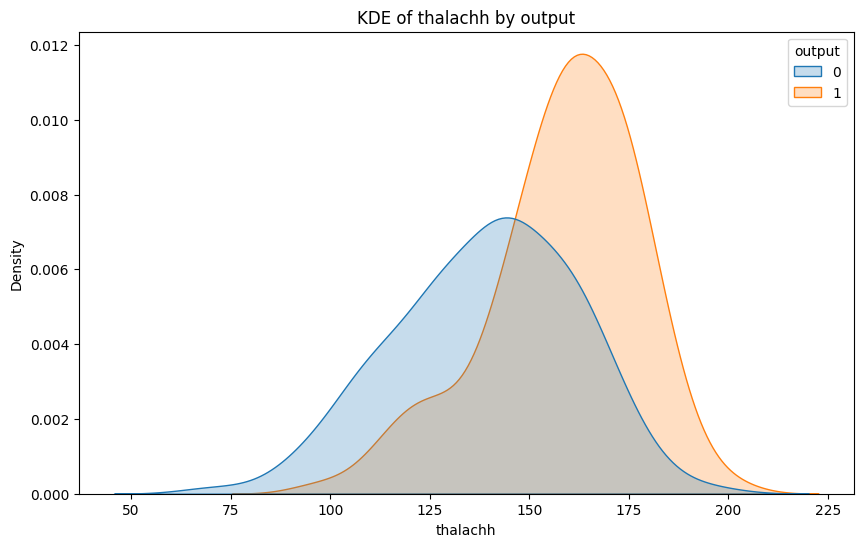

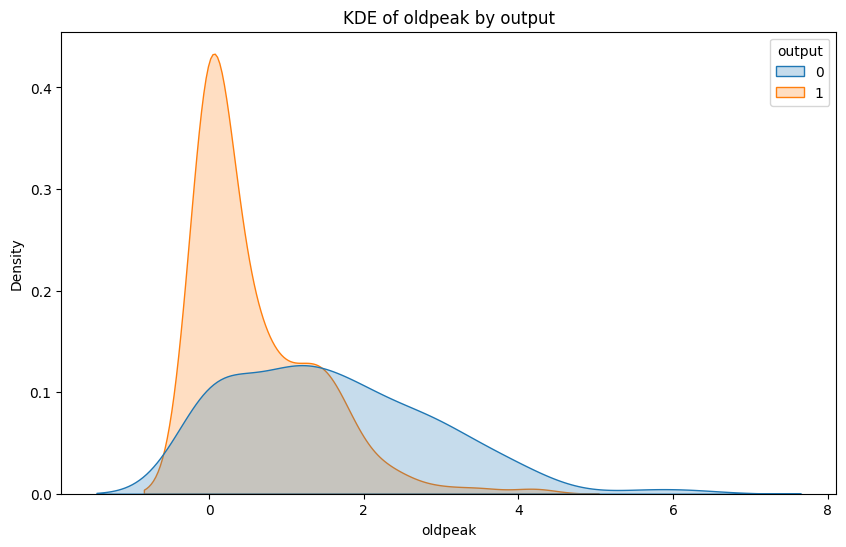

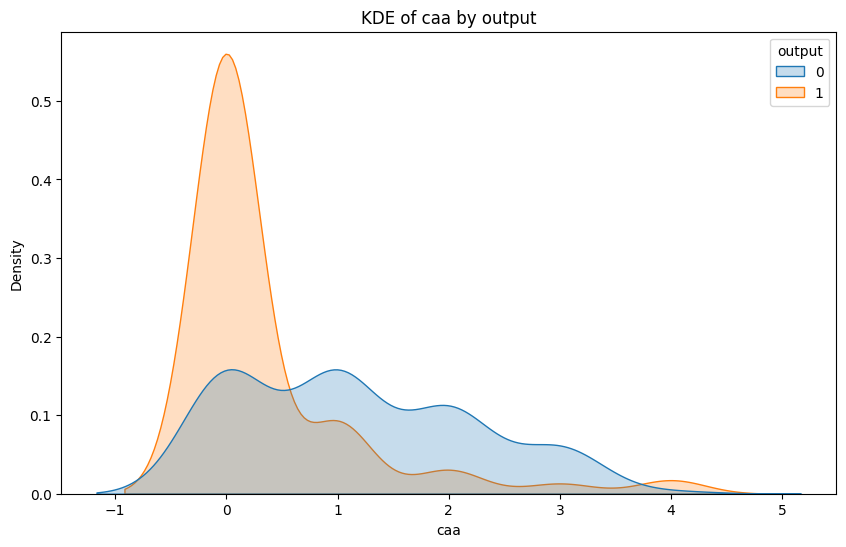

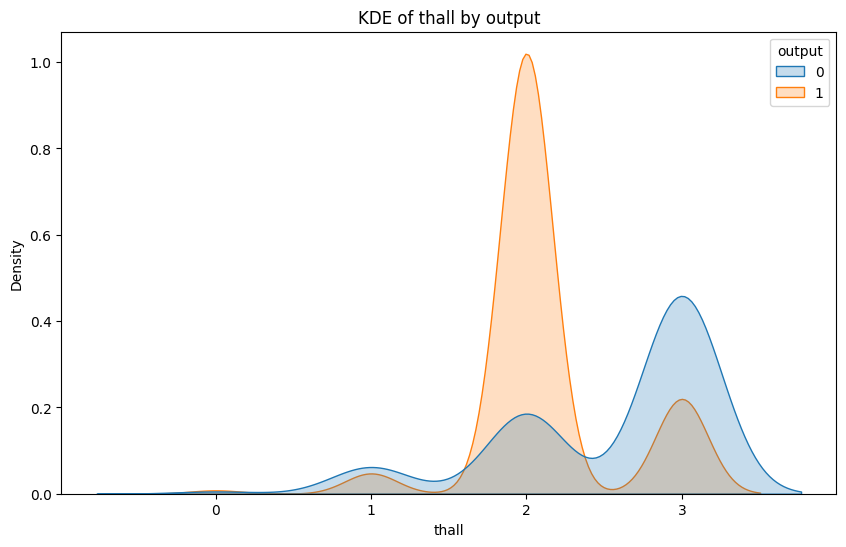

In [54]:
for column in continuous_df.columns.drop('output'):
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.kdeplot(data=continuous_df, x=column, hue="output", fill=True)
    plt.title(f'KDE of {column} by output')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

In [58]:
print("In addition to the trend seen in box plot, old peak also seemed to have a strong trend.")

In addition to the trend seen in box plot, old peak also seemed to have a strong trend.


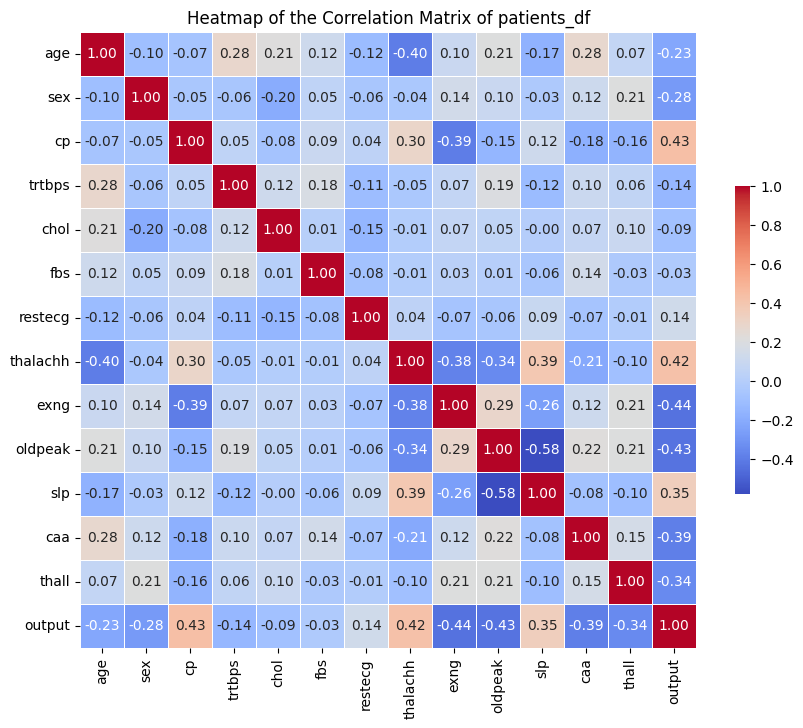

In [59]:
corr = patients_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as necessary
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Heatmap of the Correlation Matrix of patients_df')
plt.show()

In [61]:
print("Output seems to have strong correlation with several variables, such as: cp (0.42), thalachh (0.39), and slp (0.35). \
\nIt also showed strong negative correlations with oldpeak and caa.")

Output seems to have strong correlation with several variables, such as: cp (0.42), thalachh (0.39), and slp (0.35). 
It also showed strong negative correlations with oldpeak and caa.


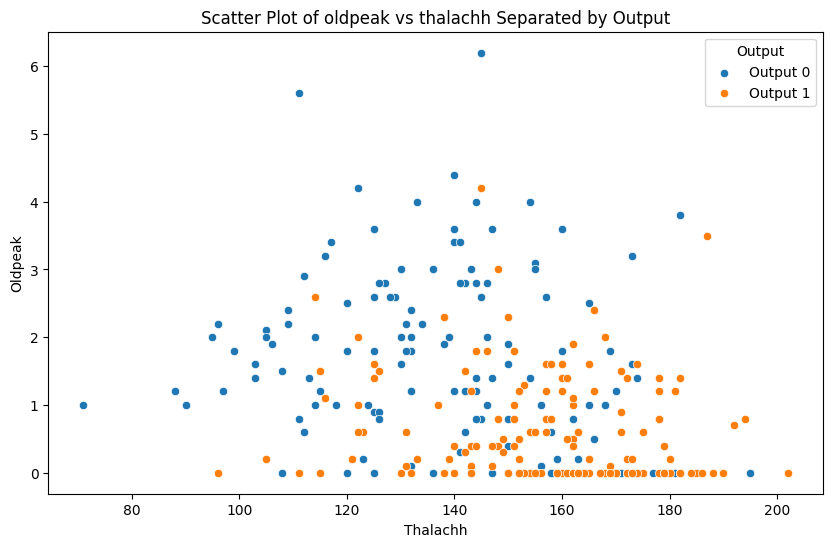

In [64]:
# Draw the line plot for 'oldpeak' and 'thalachh' across the 'output'
output_0 = continuous_df[continuous_df['output'] == 0]
output_1 = continuous_df[continuous_df['output'] == 1]

# Plotting both groups on the same axes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=output_0, x='thalachh', y='oldpeak', label='Output 0')
sns.scatterplot(data=output_1, x='thalachh', y='oldpeak', label='Output 1')

# Add a legend and title
plt.legend(title='Output')
plt.title('Scatter Plot of oldpeak vs thalachh Separated by Output')
plt.xlabel('Thalachh')
plt.ylabel('Oldpeak')
plt.show()

In [66]:
print("Peaple with lower chance of heart attack seemed to have high oldpeak at lower thalachh.")

Peaple with lower chance of heart attack seemed to have high oldpeak at lower thalachh.


In [65]:
print('Step 8 Answers:\n\
1. Two possible models: Logistic Regression & KNN\
\n2. Label vs One Hot: Label encoding assigns each unique category in a column to a numerical integer value, while one-hot encoding creates a new binary column for each category; label encoding is used when the categorical variable has an ordinal relationship, whereas one-hot encoding is used when the categorical variable is nominal\
\n3. Multicollinearity: Multicollinearity occurs when independent variables in a regression model are highly correlated, potentially distorting predictions and the interpretation of feature importance, and it can be checked using correlation matrices or VIF calculations.\
\n4. Scailing Data Importance: It ensures that all features contribute equally to the result, allowing models that are sensitive to the scale of input to perform better and converge faster during training.\
\n5. LR & KNN Parametric?: Logistic regression is a parametric algorithm because it assumes a fixed number of parameters determined by the model form, whereas KNN is a non-parametric algorithm as it makes no such assumption and can adapt to the shape of the underlying data distribution.\
\n6. Missing Value Handling: We could handle missing values by imputing them with statistical measures (mean, median, mode), using algorithms that support missing values, deleting rows or columns with missing data, or employing predictive modeling techniques to estimate the missing values.')

Step 8 Answers:
1. Two possible models: Logistic Regression & KNN
2. Label vs One Hot: Label encoding assigns each unique category in a column to a numerical integer value, while one-hot encoding creates a new binary column for each category; label encoding is used when the categorical variable has an ordinal relationship, whereas one-hot encoding is used when the categorical variable is nominal
3. Multicollinearity: Multicollinearity occurs when independent variables in a regression model are highly correlated, potentially distorting predictions and the interpretation of feature importance, and it can be checked using correlation matrices or VIF calculations.
4. Scailing Data Importance: It ensures that all features contribute equally to the result, allowing models that are sensitive to the scale of input to perform better and converge faster during training.
5. LR & KNN Parametric?: Logistic regression is a parametric algorithm because it assumes a fixed number of parameters determin

In [90]:
#encoding
encoded_categorical_df = pd.get_dummies(categorical_df)
patients_df_cleaned = patients_df.drop(categorical_df.columns, axis=1)
patients_df_encoded = pd.concat([patients_df_cleaned, encoded_categorical_df, continuous_df], axis=1)

In [91]:
from sklearn.preprocessing import StandardScaler

#scailing for loistic regression
scaler = StandardScaler()
patients_df_scaled = scaler.fit_transform(patients_df_encoded)
patients_df_scaled = pd.DataFrame(patients_df_scaled, columns=patients_df_encoded.columns)

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = patients_df_scaled
y = patients_df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [96]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
patients_df_min_max_scaled = min_max_scaler.fit_transform(patients_df_encoded)
patients_df_min_max_scaled = pd.DataFrame(patients_df_min_max_scaled, columns=patients_df_encoded.columns)

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = patients_df_min_max_scaled
y = patients_df['output']

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [100]:
from sklearn.metrics import classification_report, confusion_matrix

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

Logistic Regression Confusion Matrix:
[[29  0]
 [ 0 32]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.94      0.97        32

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61

KNN Confusion Matrix:
[[29  0]
 [ 2 30]]


In [103]:
print("As of encoding, I used one hot encoding for both models. I used standard scailing for logistic regression as it centers the data around mean zero with a standard deviation of one, which is beneficial for convergence. And I used Min-Max scailing for KNN as it scales the data to a fixed range (usually 0 to 1), which can help in making distance calculations more uniform.")
print("Report:\nThe Logistic Regression model achieved perfect performance metrics across all categories, \nincluding precision, recall, and f1-score, with an overall accuracy of 100%. This is reflected in \nthe confusion matrix, showing that all 29 instances of class 0 and all 32 instances of class 1 were correctly identified, \nwith no misclassifications. In contrast, the KNN model showed slightly lower performance, \nwith an overall accuracy of 97%. It perfectly identified all instances of class 0 but misclassified 2 instances of class 1 as class 0,\n as shown in the confusion matrix. The precision for class 0 was 0.94, indicating a slight underperformance in correctly predicting class 0 instances compared \nto the perfect score of the Logistic Regression model. The results suggest that while both models performed well, the Logistic\n Regression model was more effective in this scenario, achieving perfect classification, whereas KNN showed a small degree of error in classifying class 1 instances.")

As of encoding, I used one hot encoding for both models. I used standard scailing for logistic regression as it centers the data around mean zero with a standard deviation of one, which is beneficial for convergence. And I used Min-Max scailing for KNN as it scales the data to a fixed range (usually 0 to 1), which can help in making distance calculations more uniform.
Report:
The Logistic Regression model achieved perfect performance metrics across all categories, 
including precision, recall, and f1-score, with an overall accuracy of 100%. This is reflected in 
the confusion matrix, showing that all 29 instances of class 0 and all 32 instances of class 1 were correctly identified, 
with no misclassifications. In contrast, the KNN model showed slightly lower performance, 
with an overall accuracy of 97%. It perfectly identified all instances of class 0 but misclassified 2 instances of class 1 as class 0,
 as shown in the confusion matrix. The precision for class 0 was 0.94, indicating 